# Goodreads Book Ratings - Initial Data Exploration

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

#### Import Data

In [2]:
ratings = pd.read_csv('../../ratings.csv')

In [3]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
n_ratings = len(ratings)
print('Number of ratings: {}'.format(n_ratings))

Number of ratings: 5976479


#### How many different users are there, and how many ratings have they given?

In [5]:
n_users = len(ratings.user_id.unique())
print('Number of unique users: {}'.format(n_users))

Number of unique users: 53424


In [6]:
user_freq = ratings.user_id.value_counts() # number of ratings for each user_id
user_freq.head()

30944    200
12874    200
52036    199
28158    199
12381    199
Name: user_id, dtype: int64

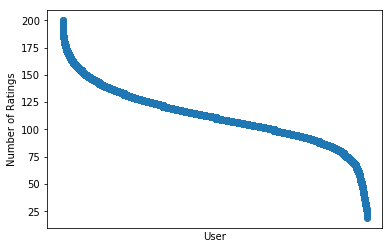

In [7]:
plt.scatter(range(len(user_freq)), user_freq)
plt.xlabel('User')
plt.ylabel('Number of Ratings')
plt.xticks([])
plt.show()

#### How many different items are there, and how many ratings do they have?

In [8]:
n_products = len(ratings.book_id.unique())
print('Number of unique items: {}'.format(n_products))

Number of unique items: 10000


In [9]:
product_freq = ratings.book_id.value_counts()
product_freq.head()

1    22806
2    21850
4    19088
3    16931
5    16604
Name: book_id, dtype: int64

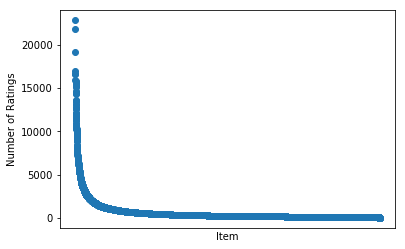

In [10]:
plt.scatter(range(len(product_freq)), product_freq)
plt.xlabel('Item')
plt.ylabel('Number of Ratings')
plt.xticks([])
plt.show()

#### How sparse is the data?

In [11]:
sparsity = (float(n_ratings) / (n_users * n_products)) * 100
print('Sparsity of ratings data: {0:.6f}%'.format(sparsity))

Sparsity of ratings data: 1.118688%


In [12]:
def pick_users_books(df, num_users, num_books):
    user_counts = pd.DataFrame(df.user_id.value_counts()).sort_values('user_id', ascending=False)
    top_10K_users = list(user_counts[0:num_users].index)
    user_filtered_df = df[df.user_id.isin(top_10K_users)]
    filtered_book_counts = pd.DataFrame(user_filtered_df.book_id.value_counts()).sort_values('book_id', ascending = False)
    top_100_filtered_books = list(filtered_book_counts[0:num_books].index)
    filtered_df = user_filtered_df[user_filtered_df.book_id.isin(top_100_filtered_books)]
    print("New dataframe has {} users, {} items, and a sparsity of {}".format(len(filtered_df.user_id.unique()),
                                                                              len(filtered_df.book_id.unique()),
                                                                              float(len(filtered_df))/(len(filtered_df.user_id.unique())*len(filtered_df.book_id.unique()))))
    train, test = train_test_split(filtered_df, test_size = 0.2, random_state=42)
    return train, test
    
def get_all_subsets(df):
    train_500_20, test_500_20 = pick_users_books(df, 500, 20)
    train_2000_50, test_2000_50 = pick_users_books(df, 2000, 50)
    train_10000_100, test_10000_100 = pick_users_books(df, 10000, 100)
    return train_500_20, test_500_20, train_2000_50, test_2000_50, train_10000_100, test_10000_100

In [13]:
train_500_20, test_500_20, train_2000_50, test_2000_50, train_10000_100, test_10000_100 = get_all_subsets(ratings)

New dataframe has 487 users, 20 items, and a sparsity of 0.442607802875
New dataframe has 1981 users, 50 items, and a sparsity of 0.374558303887
New dataframe has 9980 users, 100 items, and a sparsity of 0.271965931864
